In [1]:
#import libarary

import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
xl=pd.ExcelFile(r"C:\Users\Slmss\Documents\GitHub\DataSet\EastWestAirlinesCluster.xls")

In [3]:
#read csv file
EastWestAirlines = pd.read_excel(xl,'data')

In [4]:
EastWestAirlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
#feture selection

X = np.array(EastWestAirlines.drop(['Award?'], 1).astype(int))
y = np.array(EastWestAirlines['Award?'])

C:\Users\Slmss\AppData\Local\Temp\ipykernel_11952\392401276.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(EastWestAirlines.drop(['Award?'], 1).astype(int))


In [6]:
kmeans = KMeans(n_clusters=2) # want 2 cluster
kmeans.fit(X)

KMeans(n_clusters=2)

In [7]:
#accuracy
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6444111027756939


In [8]:
# want 3 cluster
kmeans1 = kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans1.fit(X)

C:\Users\Slmss\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=600, n_clusters=3)

In [9]:
#K Means Result
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.3583395848962241


In [10]:
#Show Kmenas Predict labels
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
#converting numpy array into pandas series object 
md=pd.Series(kmeans.labels_)
md

0       1
1       1
2       1
3       1
4       1
       ..
3994    1
3995    1
3996    1
3997    1
3998    1
Length: 3999, dtype: int32

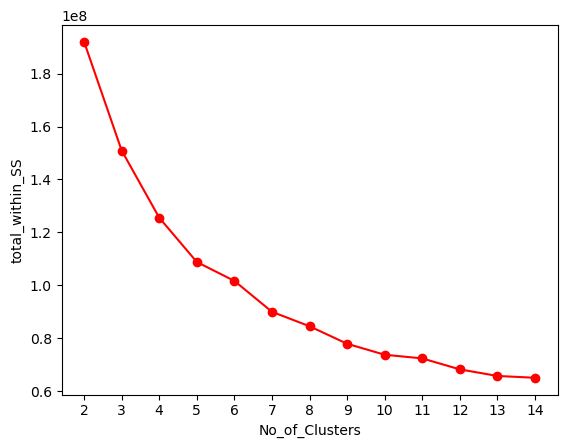

In [12]:
#find best Value For K

k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(EastWestAirlines)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(EastWestAirlines.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,EastWestAirlines.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()